<font size = 6> Отбор данных одномерной выборки

Выполнил: Иванов Роман (ММБ-004)

Цель работы - очистка данных одномерной выборки, т.е. поиск и удаление аномальных значений

# Введение

Подключим библиотек pandas, matplotlib.pyplot, numpy, scipy.stats.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Ограничим вывод на печать размер таблиц: количество столбцев не более 9, количество строк не более 5.

In [ ]:
pd.set_option("display.max_columns", 9)
pd.set_option("display.max_rows", 5)

Импортируем данные

In [ ]:
ds0 = pd.read_csv("ML.ds1.csv")
ds0

,v1,v2,v3,v4,...,v72,v73,v74,v75
0,1.674664,-0.105114,1.123071,0.159780,...,0.496592,0.728681,-1.186913,0.871300
1,1.815983,0.793212,0.437694,1.374387,...,0.583847,1.338758,2.582966,1.162462
...,...,...,...,...,...,...,...,...,...
498,1.403898,0.265252,0.834466,0.207733,...,0.337280,0.951353,1.536677,0.625214
499,1.160811,1.626182,1.183740,0.503894,...,0.527576,1.011879,0.356646,0.798382


Выделим в отдельную таблицу столбец v46 и переименуем его в s46.

In [ ]:
ds = ds0[['v46']].rename({'v46':'s46'}, axis = 1)
ds

,s46
0,1.748042
1,1.306951
...,...
498,5.074262
499,1.677875


## Описательная статистика

Вычислим числовые характеристики выборки, которые будут использоваться в дальнейшем и составим из них таблицу:

In [ ]:
mu = ds.s46.mean()
sd = ds.s46.std()
md = ds.s46.median()
sk = ds.s46.skew()

In [ ]:
names = ['mean', 'std', 'median', 'skew']
values = [mu, sd, md, sk]
pd.DataFrame(values, names, columns = ['Sample']).T

,mean,std,median,skew
Sample,5.195641,3.062415,4.653218,0.93753


### Комментарий

mean —
выборочное среднее, т.е. оценка математического ожидания генеральной совокупности,
представленной имеющейся выборкой.

std - стандартное отклонение, т.е. оценка среднего квадратичного отклонения генеральной совокупности, представленной имеющейся выборкой.

median - выборочная медиана, т.е. оценка медианы генеральной совокупности, представленной имеющейся выборкой.

skew — выборочный коэффициент асимметрии,
т.е. оценка коэффициента асимметрии генеральной совокупности, представленной имеющейся выборкой.

# Визуализация данных

Построим диаграмму рассеяния, расположив выборочные значения по горизонтальной оси

Text(0.5, 1.0, 'Выборочные значения')

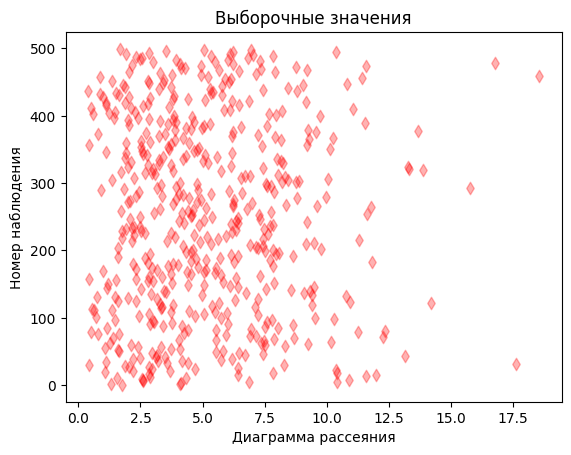

In [ ]:
plt.scatter(x = ds.s46, y = ds.index, c = 'r', marker = 'd', s = 40, alpha = 0.3)
plt.xlabel("Диаграмма рассеяния")
plt.ylabel("Номер наблюдения")
plt.title("Выборочные значения")

В выборке, скорее всего, есть аномальные данные

Генеральная совокупность не симметрична, пологая часть кривой распределения расположена справа





Построим диаграмму размаха

Text(0.5, 0, 'Выборочные значения')

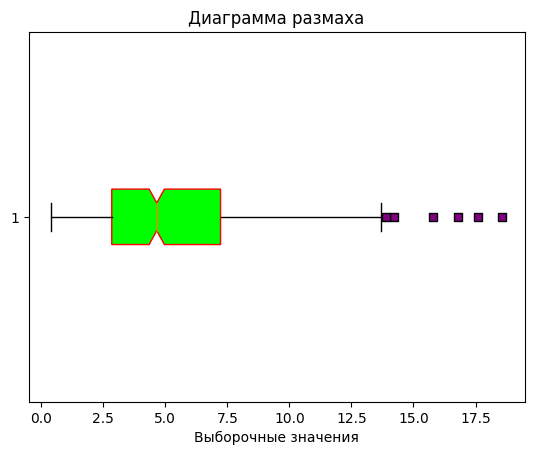

In [ ]:
box = plt.boxplot(ds.s46, vert = False, notch = True, patch_artist = True,
                  flierprops = dict(markerfacecolor = 'purple', marker = 's'),
                  boxprops = dict(color = 'red', facecolor = 'lime' ) )
plt.title("Диаграмма размаха")
plt.xlabel("Выборочные значения")

В выборке, по-видимому, присутствуют аномальные данные.

Генеральная совокупность не симметрична (усы разной длины), пологая часть кривой распределения расположена справа.




Построим диаграмму гистограмму

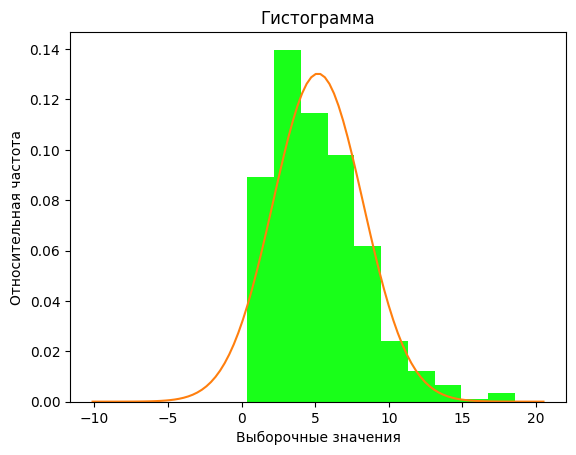

In [ ]:
plt.hist(ds.s46, density = True, facecolor = 'lime', alpha = 0.9)
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(mu - 5*sd, mu + 5*sd, 100)
plt.plot(x, stats.norm.pdf(x, mu, sd))

Генеральная совокупность не симметрична, пологая часть кривой распределения расположена справа

## Вывод

Анализ данных показал:

*   в выборке, по-видимому, присутствуют аномальные данные;
*   генеральная совокупность, скорее всего, не симметрична, то есть 
график плотности распределения исследуемого показателя генеральной совокупности не симметричен.


# Отбор данных

## Проверка на симметричность

Проведем первый тест основанный на сравнении выборочного среднего с выборочной медианой, для этого вычислим наблюдаемое заначение и критическое

Наблюдаемое значение


In [ ]:
xn = abs(mu - md)
xn

0.5424220466571965

Критическое значение

In [ ]:
import math
xk = (3*sd)/(math.sqrt(500))
xk

0.41086605976983237

Наблюдаемое значение получилось больше критического, следовательно гипотеза о симметричности генеральной совокупности отвергается.

Проведем второй тест основанный на оценке величины выборочного коэффициента асимметричности, для этого вычислим наблюдаемое заначение и критическое

Наблюдаемое значение

In [ ]:
xn = abs(sk)
xn

0.9375297353597924

Критическое значение

In [ ]:
xk = 3*math.sqrt((6*(500 - 1))/((500 + 1)*(500 + 3)))
xk

0.3269973982840565

Наблюдаемое значение получилось больше критического, следовательно гипотеза о симметричности генеральной совокупности отвергается.

### Вывод

Генеральная совокупность не симметрична на основании анализа диаграмм и резултатов тестов.

## Чистка данных

Так как генеральная совокупность не симметрична, проведем отбор на интервале $(\overline x - 5s, \overline x + 5s)$, где 
$\overline x$ - среднее значение генеральной совокупности,
s - стандартное отклонение.

Вычеслим границы интервала

In [ ]:
a = mu - 5*sd
b = mu + 5*sd
a, b

(-10.116433444115406, 20.50771453231249)

Отсеим аномальные значения

In [ ]:
qds = ds.query('s46 > @a')
qds = qds.query('s46 < @b')
qds

,s46
0,1.748042
1,1.306951
...,...
498,5.074262
499,1.677875


По итогу очистки данных из выборки не выпало ни одного значения.

# Заключение

Целью работы было очистить данные одномерной выборки, то есть найти и удалить аномальные значения. Цель достигнута.

Были использованы библиотеки: pandas, matplotlib.pyplot, numpy, scipy.stats и math.


Построили и проанализировали диаграммы рассеяния, размаха и гистограмма. На основе данного анализа сделан предварительный вывод о несимметричности генеральной совокупности.


На основании двух тестов гипотеза о симметричности генеральной совокупности отвергнута.


На основании сделанного вывода провели очистку данных.
Аномальных данных не обнаружено.

